In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import arviz as az
import numpy as np

In [18]:
flows = pd.read_csv(r"..\..\UK-wood-mfa\build\flows.csv")
flows_obs= pd.read_csv(r'..\..\UK-wood-mfa\build\flows_obs.csv')
Observations = pd.read_excel(r"..\..\UK-wood-mfa\data\observations_with_references.xlsx")
flows_name = pd.read_excel(r'..\..\UK-wood-mfa\lists\flows_name.xlsx')
products_consumption = pd.read_excel(r'..\..\UK-wood-mfa\data_analysis\finished_products_consumption.xlsx')
products_consumption = products_consumption.set_index(['target'])



In [19]:
flows_name = list(flows_name.to_records())
flows_obs_list = list(flows_obs.to_records())

In [20]:
link = 'http://ukfires.org/analyses/UK-wood/system/'
Consumption = 'Consumption'

In [21]:
#UK consumption of finished products
link = 'http://ukfires.org/analyses/UK-wood/system/'
consumed_products = []
for flow in flows_name:
            consumption_flow_products = flows.loc[(flows['material'] == flow[3]) 
                                       & (flows['source'] == flow[1])
                                       & (flows['target'] == flow[2])]
            if (((link + 'PackagingConsumption') in flow[2])
                or ((link + 'GraphicPapersConsumption') in flow[2])
                or ((link + 'SanitaryPapersConsumption') in flow[2])
                or ((link + 'OtherPaperProductsConsumption') in flow[2])
                 

                or ((link + 'WindowsConsumption') in flow[2]) 
                or ((link + 'DoorsConsumption') in flow[2])
                or ((link + 'FlooringConsumption') in flow[2])
                
                or ((link + 'PalletsConsumption') in flow[2])
                or ((link + 'RefurbishedPalletsConsumption') in flow[2])
                or ((link + 'OtherWoodContainersConsumption') in flow[2])
                 
                or ((link + 'DeckingConsumption') in flow[2])
                or ((link + 'FencingPostsConsumption') in flow[2])
                or ((link + 'WoodenOutbuildingsConsumption') in flow[2])
                or ((link + 'FencingRailsAndBoardsConsumption') in flow[2])
                 
                 
                or ((link + 'OtherEnergyFeedstocksConsumption') in flow[2])
                or ((link + 'PreConsumerWasteProductsConsumption') in flow[2])
                or ((link + 'WoodCharcoalConsumption') in flow[2])
                
                or ((link + 'WoodPelletsConsumption') in flow[2])
                 
                or ((link + 'WoodFloorFramingForNewStructures') in flow[2])
                or ((link + 'WoodRoofsForNewStructures') in flow[2])
                or ((link + 'WoodFramesForNewStructures') in flow[2])
                 
                or ((link + 'RenovationsSawnwoodConsumption') in flow[2])
                or ((link + 'SawnwoodToRMIAndOtherConsumption') in flow[2])
                or ((link + 'ParticleboardToRMIAndOtherConsumption') in flow[2])
                or ((link + 'PlywoodToRMIAndOtherConsumption') in flow[2])
                or ((link + 'OtherEngineeredWoodProductsConsumption') in flow[2])
                 
                or ((link + 'WoodenKitchenFurnitureConsumption') in flow[2])
                or ((link + 'WoodenSeatsConsumption') in flow[2])
                or ((link + 'WoodenBedroomFurnitureConsumption') in flow[2])
                or ((link + 'WoodenOfficeFurnitureConsumption') in flow[2])
                or ((link + 'WoodenOtherFurnitureConsumption') in flow[2])
                 
                or ((link + 'FormworkScaffoldingConsumption') in flow[2])
                or ((link + 'OtherObjectsConsumption') in flow[2]
                or ((link + 'WoodWoolAndFlourConsumption') in flow[2])
                or ((link + 'FibreboardToRMIAndOtherConsumption') in flow[2])
                or ((link + 'RailwaySleepersConsumption' ) in flow[2]))):
                    if ((('exports') not in flow[2])
                        and (('imports') not in flow[1])
                       # and (('Consumption') not in flow[2])
                        and (('Manufacturing') not in flow[2])
                        and (('WoodFibres') not in flow[2])
                        and (('Roundwood') not in flow[2])
                        and (('PostConsumerWood') not in flow[2])
                        and (('Production') not in flow[2])
                        and (('ByProducts') not in flow[2])):
                                                            
                            consumption_flow_products = consumption_flow_products.set_index("target")
                          


                            consumption_products_renamed= consumption_flow_products.rename(index={
                                                                                                  link + 'OtherObjectsConsumption' : 'Other objects',
                                                                                                   link + 'FormworkScaffoldingConsumption': 'Sawnwood to construction',
                                                                                                   link + 'RailwaySleepersConsumption' : 'Sawnwood to construction',
                                                                                                   link + 'WoodCharcoalConsumption': 'Other energy feedstocks',
                                                                                                   link + 'WoodWoolAndFlourConsumption' : 'Other objects',
                                                                                                    link + 'OtherEngineeredWoodProductsConsumption' : 'Other engineered products to construction',
                                                                                        
                                                                                                   link + 'GraphicPapersConsumption': 'Graphic papers',
                                                                                                   link + 'WindowsConsumption': 'Joinery',
                                                                                                   link + 'DoorsConsumption': 'Joinery',
                                                                                                   link + 'FlooringConsumption': 'Joinery',
                                                                                                   link + 'PreConsumerWasteProductsConsumption': 'Industrial residues',
                                                                                                   link + 'OtherWoodContainersConsumption': 'containers',
                                                                                                   link + 'SanitaryPapersConsumption': 'Sanitary papers',
                                                                                                   link + 'PackagingConsumption': 'Packaging',
                                                                                                   link + 'PalletsConsumption' : 'containers',
                                                                                                   link + 'RefurbishedPalletsConsumption' : 'containers',
                                                                                                   link + 'OtherPaperProductsConsumption': 'Other papers',
                                                                                                   link + 'WoodenKitchenFurnitureConsumption' : 'Furniture',
                                                                                                   link + 'WoodenSeatsConsumption': 'Furniture',
                                                                                                   link + 'WoodenBedroomFurnitureConsumption': 'Furniture',
                                                                                                   link + 'WoodenOfficeFurnitureConsumption': 'Furniture',
                                                                                                   link + 'WoodenOtherFurnitureConsumption': 'Furniture',

                                                                                        
                                                                                                   link + 'PreConsumerWasteProductsConsumption': 'Industrial residues',
                                                                                                   link + 'PreConsumerWasteConstructionConsumption': 'Industrial residues',

                                                        
                                                                                                   link + 'FencingRailsAndBoardsConsumption': 'Fencing and Outdoors',
                                                                                                   link + 'FencingPostsConsumption': 'Fencing and Outdoors',
                                                                                                  

                                                                                                   link + 'OtherEnergyFeedstocksConsumption': 'Other energy feedstocks',


                                                                                                   link + 'WoodPelletsConsumption': 'Wood pellets',


                                                                                                   link + 'WoodFloorFramingForNewStructures': 'Structure',
                                                                                                   link + 'WoodRoofsForNewStructures': 'Structure',
                                                                                                   link + 'WoodFramesForNewStructures': 'Structure',

                                                                                                   link + 'RenovationsSawnwoodConsumption': 'Prefab products',
                                                                                                   link + 'SawnwoodToRMIAndOtherConsumption': 'Sawnwood to construction',
                                                                                                   link + 'ParticleboardToRMIAndOtherConsumption': 'Particleboard to construction',
                                                                                                   link + 'PlywoodToRMIAndOtherConsumption': 'Plywood to construction',
                                                                                                   link + 'FibreboardToRMIAndOtherConsumption': 'Fibreboard to construction',
                                                                                                    })


                            consumed_products.append(consumption_products_renamed)

                   
consumed_products = pd.concat(consumed_products)  


consumed_products= consumed_products.reset_index(level='target')
consumed_products = consumed_products.groupby(['target','sample']).sum()
consumed_products = consumed_products.reset_index(level='sample')
consumed_products= consumed_products.reset_index(level='target')
consumed_products.to_clipboard()
consumed_products['value']=consumed_products['value'] / 1000000000 
consumed_products.to_clipboard()

C:\Users\rla44\AppData\Local\Temp\ipykernel_1760\3160445921.py:128: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  consumed_products = consumed_products.groupby(['target','sample']).sum()


In [22]:
consumed_products.to_clipboard()

In [23]:
custom_order = [
   "Other energy feedstocks",
     "Wood pellets",
   
     
   
    
    #   "Pallets",
     "containers",
     #  "Refurbished pallets",
   "Fencing and Outdoors",
       "Furniture",
     "Other objects",
    
    "Plywood to construction",
     "Fibreboard to construction",
    'Other engineered products to construction',
     
   
   
  "Particleboard to construction",
    "Structure",
    "Sawnwood to construction",
       "Joinery",
    
     "Industrial residues",
    
  #  "papers",
    
   
   
 
    "Other papers",
    "Graphic papers",
    
    "Sanitary papers",
    "Packaging",
]

# Convert 'target' column to a categorical data type with the custom order
consumed_products["target"] = pd.Categorical(consumed_products["target"], categories=custom_order, ordered=True)

# Sort the DataFrame based on the 'target' column
consumed_products_sorted = consumed_products.sort_values(by="target")

# Reset the index to maintain a continuous index
consumed_products_sorted = consumed_products_sorted.reset_index(drop=True)


In [24]:
Means = consumed_products_sorted.groupby('target')['value'].mean()
df= pd.DataFrame(Means)


C:\Users\rla44\AppData\Local\Temp\ipykernel_1760\2513715238.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\rla44\AppData\Local\Temp\ipykernel_1760\2513715238.py:51: UserWarning: The palette list has more values (20) than needed (18), which may not be intended.
  sns.violinplot(


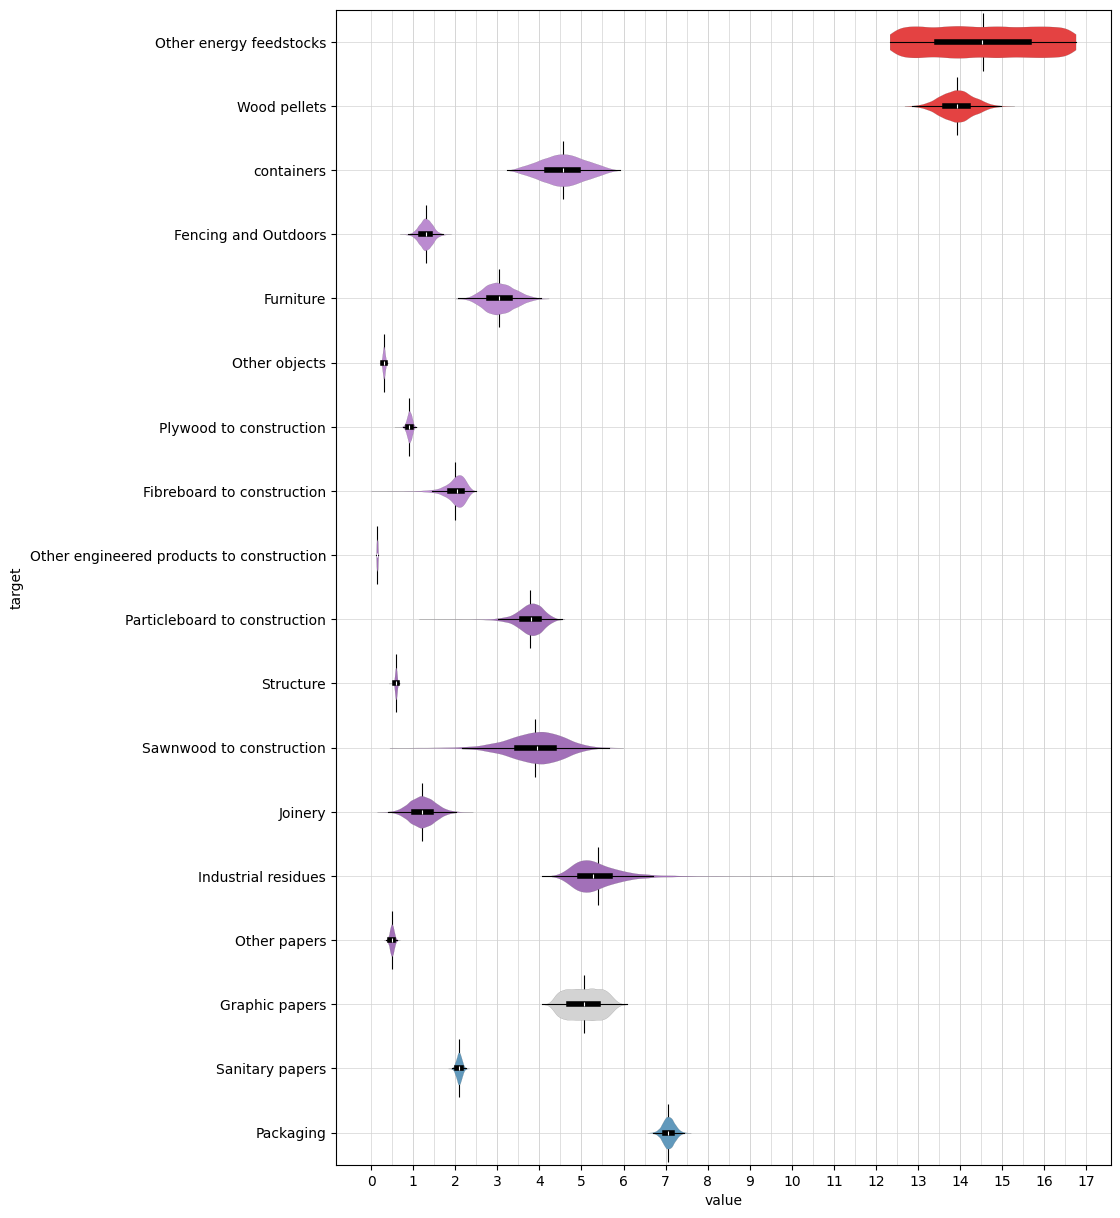

,Object,Uncertainty index,min,max,mean,median,diff_min,diff_max
0,Other energy feedstocks,0.304095,12.322868,16.741638,14.530897,14.522214,2.208029,-2.210742
1,Wood pellets,0.152456,12.846081,14.967488,13.914872,13.913903,1.068791,-1.052616
2,containers,0.589475,3.234259,5.922948,4.561159,4.560037,1.326900,-1.361789
3,Fencing and Outdoors,0.634743,0.886035,1.710151,1.298346,1.296527,0.412312,-0.411805
4,Furniture,0.645115,2.060046,4.029502,3.052876,3.035206,0.992830,-0.976626
5,Other objects,0.507349,0.225899,0.379943,0.303626,0.303238,0.077727,-0.076317
6,Plywood to construction,0.338880,0.756008,1.063900,0.908557,0.909899,0.152548,-0.155343
7,Fibreboard to construction,0.526900,1.441833,2.487496,1.984554,2.036748,0.542721,-0.502942
8,Other engineered products to construction,0.378641,0.118109,0.172930,0.144784,0.144535,0.026675,-0.028146
9,Particleboard to construction,0.408936,3.007338,4.547514,3.766303,3.797505,0.758966,-0.781211


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

         
# Set the figure size
fig =plt.figure(figsize=(10, 15))

# Define the range for vertical lines (from min to max x-values)
x_min = 0
x_max = 17
step = 0.5  # Interval between vertical lines

#plot mean on the graph
marker_size = 1700
plt.scatter(df['value'], df.index, marker='|',linewidths=0.8, s=marker_size, color='black', label='Mean',zorder=2)


# Plot vertical lines at 0.5 intervals
for x in np.arange(x_min + step, x_max, step):
    plt.axvline(x, color="lightgrey", linestyle="-", linewidth=0.5, zorder=0,)
    
density = 18
x = np.linspace(0, 17, density, endpoint=True)
plt.xticks(x,zorder=1)
# plt.axvline(0, c='k', alpha=0.5)

# Create a box plot with 'target' on the y-axis and 'value' on the x-axis
custom_palette = [
                "#ff2727",
                 "#ff2727",
               
                 "#bf7fdb",
                 "#bf7fdb",
                 "#bf7fdb",
                 "#bf7fdb",
                 "#bf7fdb",
                 "#bf7fdb",
                 "#a764c4",
                "#a764c4",
                 "#a764c4",
                 "#a764c4",
                 "#a764c4",
                 "#a764c4",
                 "#a764c4",
                "lightgrey",
                 "#529dcb", 
                  "#529dcb", 
                  "#529dcb",
                  "#529dcb",
                 ]
sns.violinplot(
    x="value",
    y="target",
    width=0.5,
   # hue= "target",
    palette=custom_palette,
    data=consumed_products,
    linewidth=0.1,
   # hue="target",
    density_norm="width",
    orient="h",
    inner_kws=dict(box_width=4, whis_width=0.8, color="black"),
    inner="box",
    cut=0,
    zorder=2,
)

# Set the title of the plot
plt.title("")

# Calculate the difference ratio for each unique 'target'
difference_ratios = []  # List to store the ratios

# Group the data by 'target'
grouped = consumed_products.groupby("target")

for name, group in grouped:
    data = group["value"]
    k = 1.5

    # Calculate quartiles and IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # Calculate bounds for outlier detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Exclude outliers
    filtered_data = [x for x in data if lower_bound <= x <= upper_bound]

    # Calculate minimum and maximum within the non-outlier range
    min_non_outlier = np.min(filtered_data)
    max_non_outlier = np.max(filtered_data)
    
    mean_val = group["value"].mean()
    min_val = group["value"].min()
    max_val = group["value"].max()
    median_val = group["value"].median()
    Diff_min =  mean_val - min_non_outlier
    Diff_max =  mean_val - max_non_outlier

    difference_ratio = (max_non_outlier - min_non_outlier) / mean_val

    difference_ratios.append((name, difference_ratio,min_non_outlier,max_non_outlier, mean_val,median_val, Diff_min, Diff_max) )  # Store the target name and ratio
    
    
difference_ratios
plt.grid(True,linewidth=0.5, color="lightgrey")

plt.show()

difference_ratio_df = pd.DataFrame(difference_ratios, columns=['Object', 'Uncertainty index', 'min', 'max', 'mean', 'median', 'diff_min', 'diff_max'])
difference_ratio_df


In [26]:
# Sort the DataFrame by the 'Value' column in descending order
df = difference_ratio_df .sort_values(by='Uncertainty index', ascending=False)
df= df.set_index('Object')


# Create a gradient color map for the 'Value' column
def gradient_color(val):
    max_val = df['Uncertainty index'].max()
    min_val = df['Uncertainty index'].min()
    normalized_value = (val - min_val) / (max_val - min_val)
    r = int(255 * (1 - normalized_value))
    return f'background-color: rgba(255, {r}, 2, 0.5)'


styled_df = df.style.applymap(lambda x: gradient_color(x), subset=['Uncertainty index'])

# Display the styled DataFrame

styled_df

,Uncertainty index,min,max,mean,median,diff_min,diff_max
Object,,,,,,,
Joinery,1.322738,0.414048,2.030456,1.222017,1.214816,0.807969,-0.808439
Sawnwood to construction,0.902130,2.154407,5.662550,3.888734,3.941755,1.734327,-1.773816
Furniture,0.645115,2.060046,4.029502,3.052876,3.035206,0.992830,-0.976626
Fencing and Outdoors,0.634743,0.886035,1.710151,1.298346,1.296527,0.412312,-0.411805
containers,0.589475,3.234259,5.922948,4.561159,4.560037,1.326900,-1.361789
Other papers,0.533046,0.362290,0.625608,0.493988,0.493948,0.131698,-0.131620
Fibreboard to construction,0.526900,1.441833,2.487496,1.984554,2.036748,0.542721,-0.502942
Other objects,0.507349,0.225899,0.379943,0.303626,0.303238,0.077727,-0.076317
Industrial residues,0.491831,4.058860,6.710335,5.391031,5.266822,1.332170,-1.319304


In [27]:
# Specify the file path along with the file name
file_path = r'C:/Users\rla44/OneDrive - University of Bath\MFA graphs/sankey_diagram_0811'


# Save the plot with the specified file path
fig.savefig(file_path, format='pdf')

# Optionally, specify DPI for higher quality
# plt.savefig(file_path, format='pdf', dpi=300)